In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv('spam.tsv',sep='\t')

In [10]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [12]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [13]:
df.shape

(5572, 4)

In [14]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

#### As we can see that the data is unbalanced(Class Imbalance)
#### So let's try to balance the data

In [17]:
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [18]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [24]:
ham = ham.sample(spam.shape[0])

In [25]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [27]:
data = ham.append(spam, ignore_index=True)
data.head()

,label,message,length,punct
0,ham,Ü thk of wat to eat tonight.,28,1
1,ham,Moji i love you more than words. Have a rich day,48,1
2,ham,K..k:)how about your training process?,38,5
3,ham,Was just about to ask. Will keep this one. May...,110,4
4,ham,Great. Never been better. Each day gives even ...,71,2


In [28]:
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


In [29]:
data['label'].value_counts()

spam    747
ham     747
Name: label, dtype: int64

#### Exploratory Data Analysis

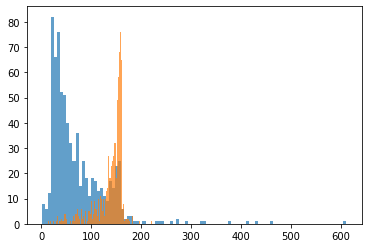

In [32]:
plt.hist(data[data['label'] == 'ham']['length'], bins=100,
         alpha=0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins=100,
         alpha=0.7)
plt.show()

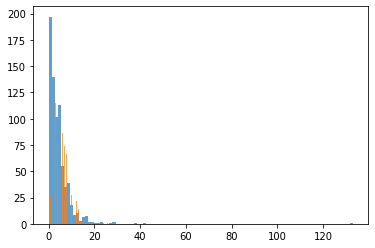

In [34]:
plt.hist(data[data['label']=='ham']['punct'], bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'], bins=100, alpha=0.7)
plt.show()

#### Data Preperation

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
data.head()

,label,message,length,punct
0,ham,Ü thk of wat to eat tonight.,28,1
1,ham,Moji i love you more than words. Have a rich day,48,1
2,ham,K..k:)how about your training process?,38,5
3,ham,Was just about to ask. Will keep this one. May...,110,4
4,ham,Great. Never been better. Each day gives even ...,71,2


In [50]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.3, random_state=0, shuffle=True, stratify=data['label'])

### Bag of word creation or vectorization

### Pipeline and RandomForest Classifier

In [ ]:
vector = TfidfVectorizer()

In [48]:
clf = Pipeline([('tfidf',TfidfVectorizer()),
                ('clf',RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [51]:
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [52]:
y_pred = clf.predict(X_test)

In [53]:
confusion_matrix(y_test, y_pred)

array([[220,   5],
       [ 25, 199]], dtype=int64)

### Findings from above Confusion Matrix

1. Out of 225 ham(legit) messages, 5 messages are classified as spam
2. Out of 224 spam messages, 25 messages are classified as ham(legit) messages

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.98      0.94       225
        spam       0.98      0.89      0.93       224

    accuracy                           0.93       449
   macro avg       0.94      0.93      0.93       449
weighted avg       0.94      0.93      0.93       449



In [56]:
print(accuracy_score(y_test,y_pred))

0.933184855233853


### Predict real message whether it is a ham or spam

In [58]:
clf.predict(['Hello, This is John'])

array(['ham'], dtype=object)

In [67]:
clf.predict(['COngratulations!, You  won  tickets to USA this summer'])

array(['ham'], dtype=object)

### Pipeline and SVM classifier

In [ ]:
vector = TfidfVectorizer()

In [84]:
clf = Pipeline([('tfidf',TfidfVectorizer()),
                ('clf',SVC(C=1000, gamma='auto'))])

In [85]:
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='aut

In [86]:
y_pred = clf.predict(X_test)

In [87]:
confusion_matrix(y_test, y_pred)

array([[222,   3],
       [ 20, 204]], dtype=int64)

### Findings from above Confusion Matrix

1. Out of 225 ham(legit) messages, 5 messages are classified as spam
2. Out of 224 spam messages, 25 messages are classified as ham(legit) messages

In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.99      0.95       225
        spam       0.99      0.91      0.95       224

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [89]:
print(accuracy_score(y_test,y_pred))

0.9487750556792873


### Predict real message whether it is a ham or spam

In [90]:
clf.predict(['Hello, This is John'])

array(['ham'], dtype=object)

In [93]:
clf.predict(['COngratulations!, You won tickets to USA this summer'])

array(['spam'], dtype=object)